# Analyse nodes

In [1]:
%env CUDA_VISIBLE_DEVICES=""

env: CUDA_VISIBLE_DEVICES=""


In [2]:
import sys
import os
from pathlib import Path
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt


sys.path.append(str(Path(os.path.abspath('')).parent))
from dataset import TorchDataset, get_data_loader, TorchDatasetNEW

In [3]:
#ID_FILE = '../id_files/dev_100.txt'
#ID_FILE = '../id_files/validation.txt'
ID_FILE = '../id_files/deepmath.txt'

In [4]:
data = TorchDatasetNEW(ID_FILE)
data

TorchDatasetNEW(32524)

## Number of nodes per problem

In [5]:
node_counts = [len(d.x) for d in data]

In [6]:
print(f"Max number of nodes:", max(node_counts))
print(f"Min number of nodes:", min(node_counts))
print(f"Avg number of nodes: {np.mean(node_counts):.2f}")

Max number of nodes: 12072
Min number of nodes: 8
Avg number of nodes: 742.37


<AxesSubplot:ylabel='Count'>

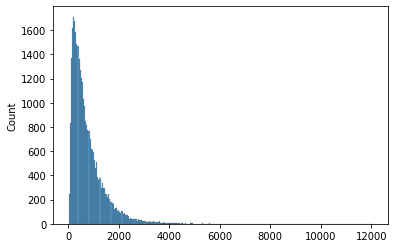

In [7]:
sns.histplot(node_counts)

## Number of axioms per problem

In [8]:
axiom_counts = [len(d.y) for d in data]

In [9]:
print(f"Max number of axioms: {max(axiom_counts)}")
print(f"Min number of axioms: {min(axiom_counts)}")
print(f"Avg number of axioms: {np.mean(axiom_counts):.2f}")

Max number of axioms: 270
Min number of axioms: 2
Avg number of axioms: 16.07


<AxesSubplot:ylabel='Count'>

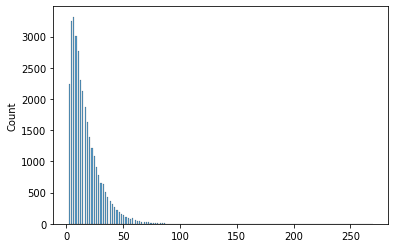

In [10]:
sns.histplot(axiom_counts)

# Ratio of axiom nodes over all nodes

In [11]:
axiom_ratio = np.divide(axiom_counts, node_counts)

In [12]:
print(f"Max ratio: {max(axiom_ratio):.3f}")
print(f"Min ratio: {min(axiom_ratio):.3f}")
print(f"Avg ratio: {np.mean(axiom_ratio):.3f}")

Max ratio: 0.250
Min ratio: 0.002
Avg ratio: 0.026


# Plot Node distribution

In [13]:
from config import NODE_TYPE

In [14]:
nodes_list = []
for d in data:
    nodes_list.extend(d.x.tolist())

c = Counter(nodes_list)
del nodes_list

In [15]:
pie_data = []
pie_labels = []
for i, n_type in NODE_TYPE.items():

    if i in c:
        pie_data.append(c[i])
        pie_labels.append(n_type)

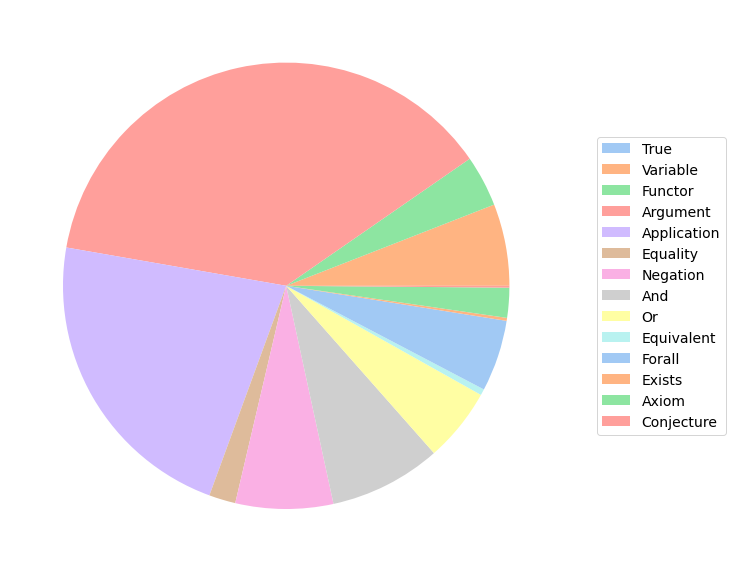

In [16]:
colors = sns.color_palette('pastel')[0:len(NODE_TYPE)]

plt.rcParams["figure.figsize"] = (10, 12)
#plt.pie(pie_data , labels= pie_label, colors = colors, autopct='%.0f%%', textprops={'fontsize': 16})
#patches, texts, ratios = plt.pie(pie_data, colors = colors, autopct='%.0f%%')
patches, texts = plt.pie(pie_data, colors = colors)

#patches, texts = plt.pie(pie_data, colors = colors) #, autopct='%.0f%%', textprops={'fontsize': 16})


plt.legend(patches, pie_labels, loc='right',fontsize=14, bbox_to_anchor=(1.3, 0.5))

#plt.tight_layout()

plt.show()

The argument node takes a surprising amount of space.
For all problems, this is as much as 38% of the nodes

In [17]:
plt.pie(pie_data , labels= pie_label, colors = colors, autopct='%.0f%%', textprops={'fontsize': 16})


NameError: name 'pie_label' is not defined